### Classifying digits using a linear SVM

In this demo, we fit a linear SVM model to the digits dataset.

The dataset is distributed along with the sklearn library and is
available at 'sklearn.datasets.load_digits()

In [1]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
data = digits['data']
target = digits['target']

x_train, x_test, y_train, y_test = train_test_split(data, target, random_state=0)

Each training example is an 8x8 image that is flattened out into an array of len 64.

In [2]:
print(x_train.shape)
x_train

(1347, 64)


array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
       [ 0.,  0.,  1., ..., 13.,  1.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])

We fit a linear svm by specifing the kernel type as 'linear'. L2 regularization
parameter in this example is set to 1, but should be picked using cross-validation.

In [3]:
from lib.model import Model
from sklearn.metrics import accuracy_score

options = dict(
    standardize = True,
    l2_lambda = 1,
    objective = 'huber_hinge',
    kernel = dict(
        fn = 'linear'
    )
)

model = Model(options)
model.fit(x_train, y_train)

100%|██████████| 45/45 [00:03<00:00, 14.54it/s]


Training accuracy:

In [4]:
yhat = model.predict(x_train)
accuracy_score(y_train, yhat)

0.9480326651818857

Test accuracy:

In [5]:
yhat = model.predict(x_test)
accuracy_score(yhat, y_test)

0.9222222222222223

The training accuracy is only slightly higher that the test accuracy, which means the
model isn't overfit too much.

Plotting the misclassification error w.r.t. to to the training iterations gives us
an idea of how quickly the model converges to the minimum of the objective function.

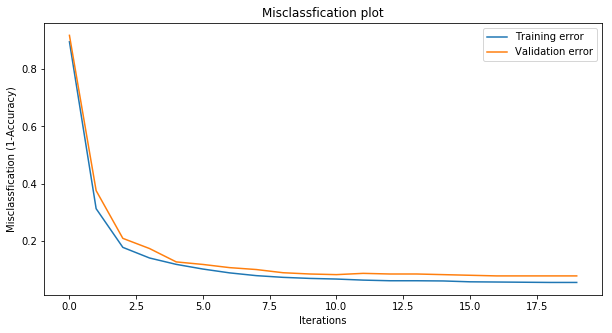

In [6]:
model.plot(x_train, y_train, x_test, y_test, iters=20)